### Escalamiento de datos numericos

#### Transformaciones lineales

In [1]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

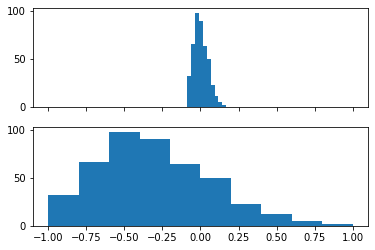

In [5]:
#reglas de escalamiento
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw) / (max_raw -min_raw)

fig, axs = plt.subplots(2,1, sharex = True)
axs[0].hist(raw)
axs[1].hist(scaled)

In [7]:
#modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [10]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
print('train raw: {}'.format(raw_time))
print('scaled raw: {}'.format(scaled_time))

train raw: 0.07510100000001785
scaled raw: 0.04626350000000912


#### Tranformaciones lineales

In [11]:
df = pd.read_csv('cars.csv')

<AxesSubplot:>

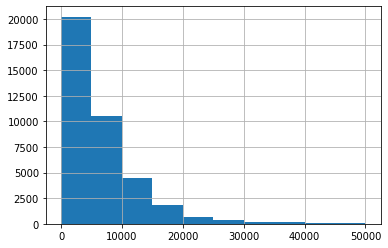

In [12]:
df.price_usd.hist()

<AxesSubplot:>

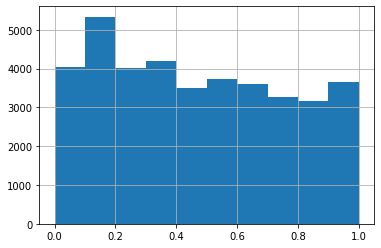

In [15]:
#transformacion con la tangente hiberbolica
p = 10000
df.price_usd.apply(lambda x : np.tanh(x/p)).hist()